## Student Performance Indicator

### Lifecycle of machine learning project
- Understanding the problem statement
- Data collection
- Data checks to perform
- Exploratory data analysis
- Data pre-processing
- Model training
- Choose the best model

### 1) Problem Statement
- This project understands hoe the student performance (test scores) is affected by other variables such as gender, ethnicity, parental level of education, lunch, and test preparation course.

### 2) Data collection
- Dataset source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

#### 2.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn, and Warnings Library**

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Import the CSV data as Pandas DataFrame**

In [141]:
df = pd.read_csv('data/StudentsPerformance.csv')

**Show Top 5 Records**

In [142]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Shape of the dataset**

In [143]:
df.shape

(1000, 8)

The data consists of 8 columns and 1000 rows

#### 2.2 Dataset information
- gender: sex of students -> (male/female)
- race/ethnicity: ethnicity of students -> (group A, B, C, D, E)
- parental level of education: parents' final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch: level of payment for lunch meal -> (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3) Data Checks to perform
- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
Check various categories present in the different categorical column

#### 3.1 Chek missing values

In [144]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

#### 3.2 Check duplicates

In [145]:
df.duplicated().sum()

np.int64(0)

There are no duplicated rows in the dataset

#### 3.3 Check data types

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values in each column

In [147]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Check statistics of the dataset

In [148]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insights**
- Overall performance (Mean): From the above description of numerical data, all means are very close to each other - between 66 and 68.5. However, average math score is the lowest among the three and rreading and writing are closed to each other indicating students generally perform better in reading and writing compared to math.
- Distribution of scores (Standard deviation): All standard deviations are aso close - between 14.6 and 15.19 indicating the spread (variability) of scores is fairly similar across the three subjects.
- Score ranges (Mean, Max, Quartiles): 
-- For minimum (Math: 0, Reading: 17, Writing: 10), some students performed extremely poorly in all subjects, with math score as low as 0, indicating possible outliers or students left the test blank.
-- All subjects have a maximum of 100, indicating some students scored perfectly in all three subjects
- Quartiles:
-- The bottom 25% of students are scoring just above 50 in all subjects (Math: 57, Reading: 59, Writing: 57.75)
-- Half of the students score below 66 in math, below 70 in reading, and below 69 in writing
-- The top 25% of students have scores above 77-79 across all subjects, showing high performers are consistent across subjects.
- Score symmetry (Comparing mean and median): In all subjects, the mean and median (50th percentile) are very close (e.g 66.09 vs 66 for math), indicatinf that the distributions are likely symmetric with no significant skewness

#### 3.6 Exploring data

In [149]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [150]:
cols_to_check = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
                   'test preparation course']

for col in cols_to_check:
    print(f"Categories in {col}: {df[col].unique()}")

Categories in gender: ['female' 'male']
Categories in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch: ['standard' 'free/reduced']
Categories in test preparation course: ['none' 'completed']


In [151]:
# Define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print(f"We have {len(numerical_features)} numerical features: ", numerical_features)
print(f"We have {len(categorical_features)} categorical features: ", categorical_features)

We have 3 numerical features:  ['math score', 'reading score', 'writing score']
We have 5 categorical features:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### 3.7 Adding columns for "Total Score" and "Average"

In [152]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = (df['total score'] / 3).round(1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.7
1,female,group C,some college,standard,completed,69,90,88,247,82.3
2,female,group B,master's degree,standard,none,90,95,93,278,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.3
4,male,group C,some college,standard,none,76,78,75,229,76.3


In [153]:
# Count students with full marks
for feature in numerical_features:
    print(f"Number of students with full marks in {feature}: {(df[feature] == 100).sum()}")

Number of students with full marks in math score: 7
Number of students with full marks in reading score: 17
Number of students with full marks in writing score: 14


In [154]:
# Count students with less than 20 marks
for feature in numerical_features:
    print(f"Number of students with less than 20 marks in {feature}: {(df[feature] <=20).sum()}")

Number of students with less than 20 marks in math score: 4
Number of students with less than 20 marks in reading score: 1
Number of students with less than 20 marks in writing score: 3


**Insights**
- From above values, we see that students perform the worst in Maths
- Best performance is in reading

### 4 Exploring Data (Visualization)

**4.1 Visualize average score distribution to make some conclusion**
- Histogram
- Kernel Distribution Function (KDE)

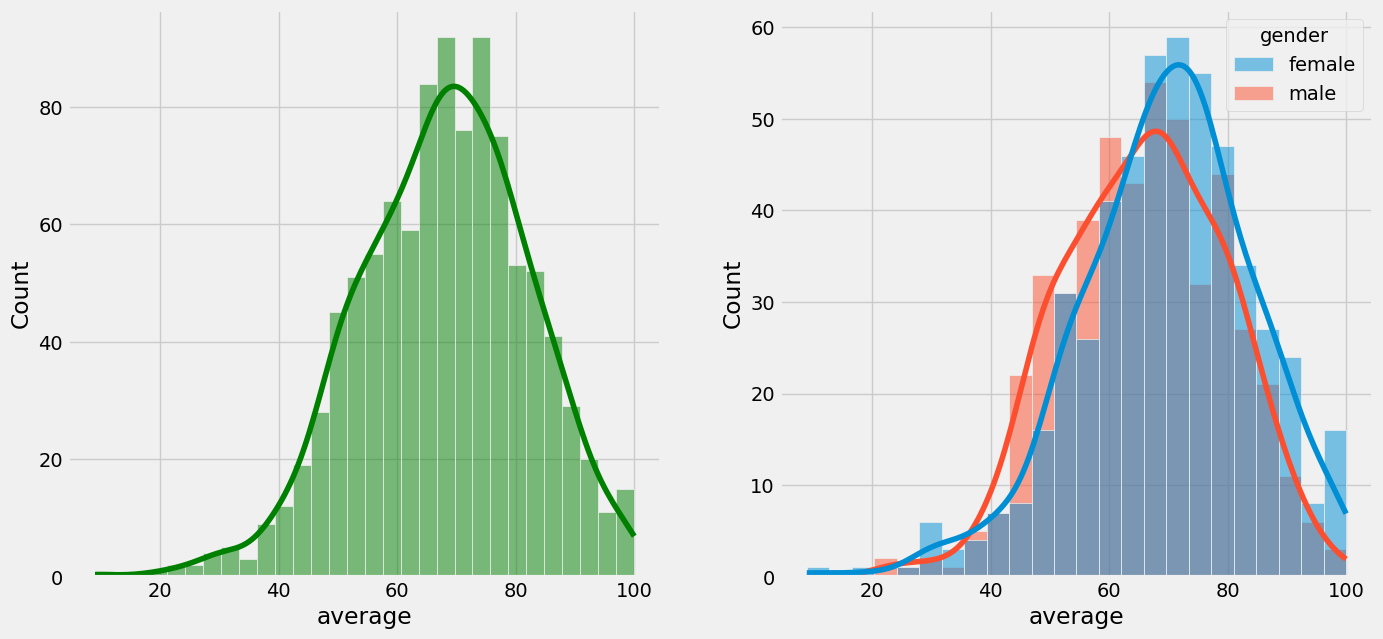

In [191]:
# Average and gender differences on the average
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

**Insight**
- Female students tend to perform better than male students

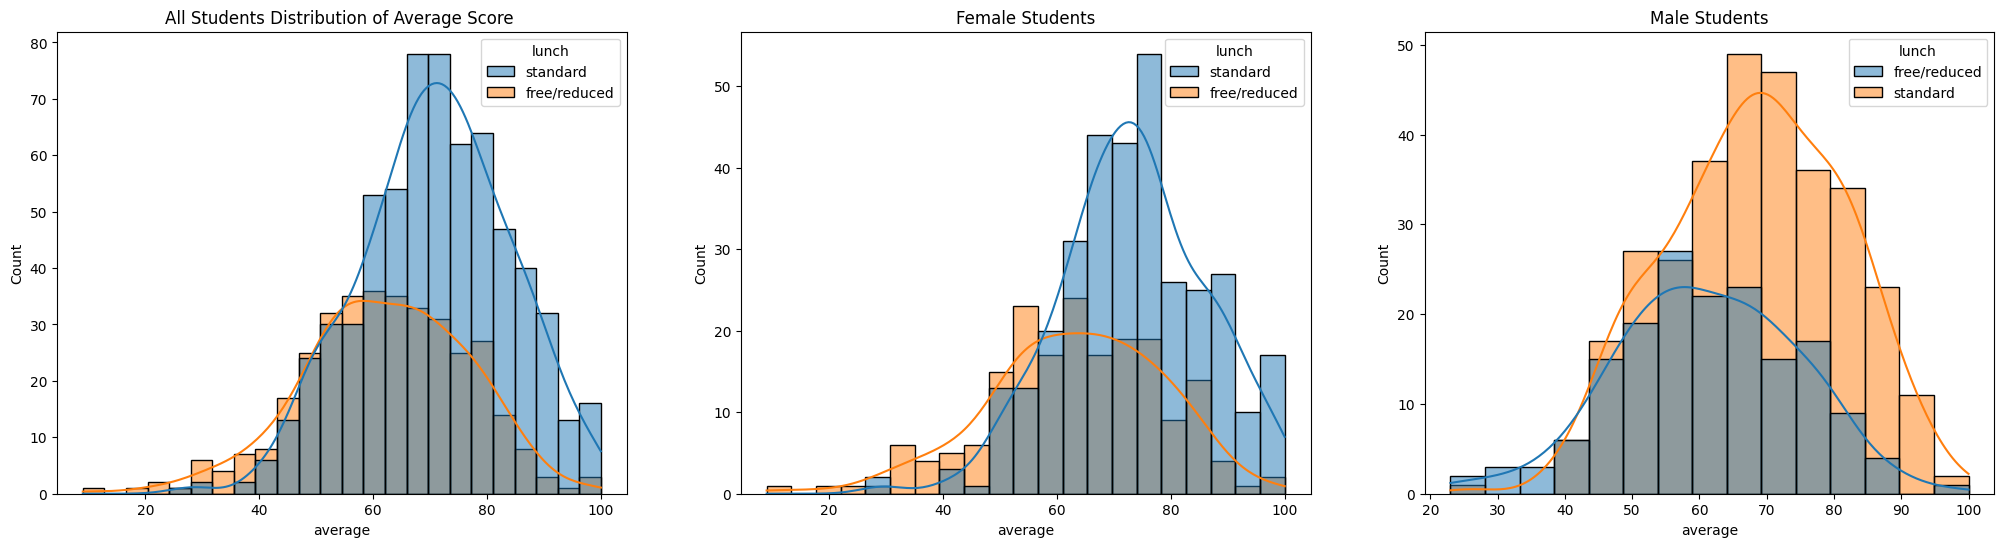

In [156]:
# Effect of lunch type of average for overall and for each genders
fig, axs = plt.subplots(1,3, figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
axs[0].set_title('All Students Distribution of Average Score ')

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch')
axs[1].set_title('Female Students')

plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch')
axs[2].set_title('Male Students')

plt.show()

**Insights**
- Standard lunch helps students perform well in exams
- Standard lunch helps students perform well be it a male or female

In [157]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.7
1,female,group C,some college,standard,completed,69,90,88,247,82.3


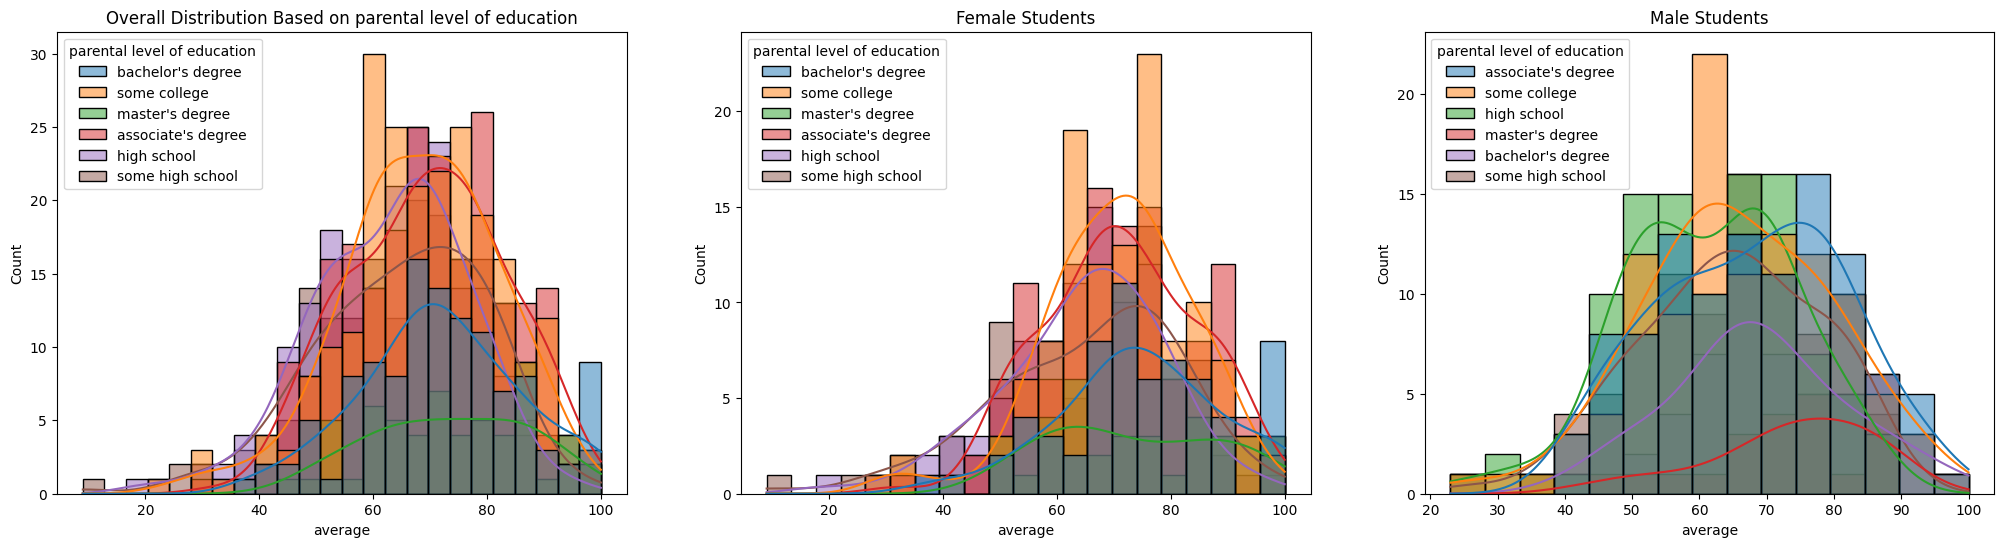

In [158]:
# Impact of parental level of education on average marks
fig, axs = plt.subplots(1,3, figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
axs[0].set_title('Overall Distribution Based on parental level of education')

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average',
             kde=True, hue='parental level of education')
axs[1].set_title('Female Students')

plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average',
             kde=True, hue='parental level of education')
axs[2].set_title('Male Students')

plt.show()

**Insights**
- In general, parents' education do not help student perform well in exam
- 3rd plot shows that parents whose education is of associate's degree or master's degree their male chils tend to perform well in exam
- In the 2rd plot we can see there is no effect of parent's education on female students.

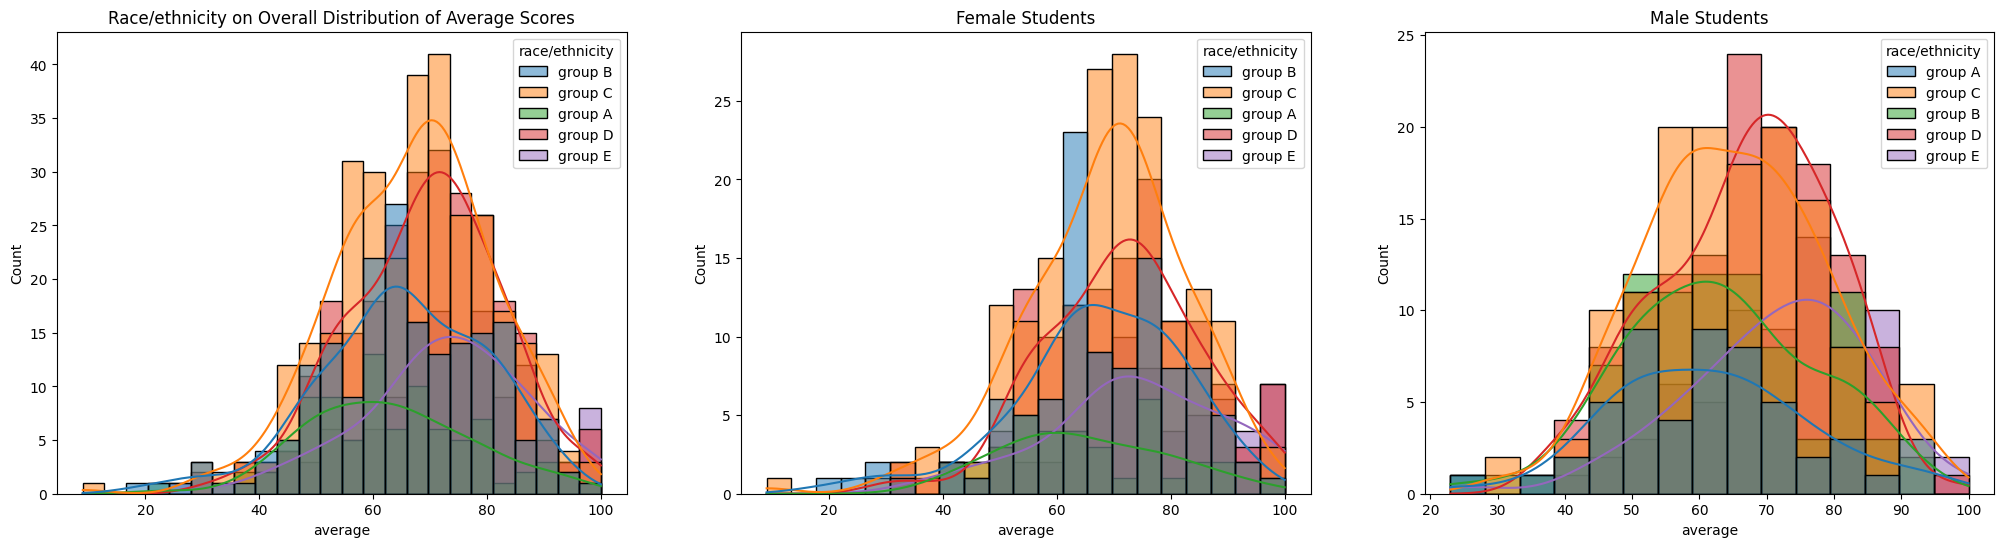

In [159]:
# Impact of race/ethnicity on average
fig, axs = plt.subplots(1,3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
axs[0].set_title('Race/ethnicity on Overall Distribution of Average Scores')

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'],
             x='average', kde=True, hue='race/ethnicity')
axs[1].set_title('Female Students')

plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],
             x='average', kde=True, hue='race/ethnicity')
axs[2].set_title('Male Students')

plt.show()

**Insights**
- Students from group A and B tend to perform poorly in exams.
- Students from group A and B tend to perform poorly in exams irrespective of thier gender.

#### 4.2 Maximum score of students in all the three subjects
**Violinplot**

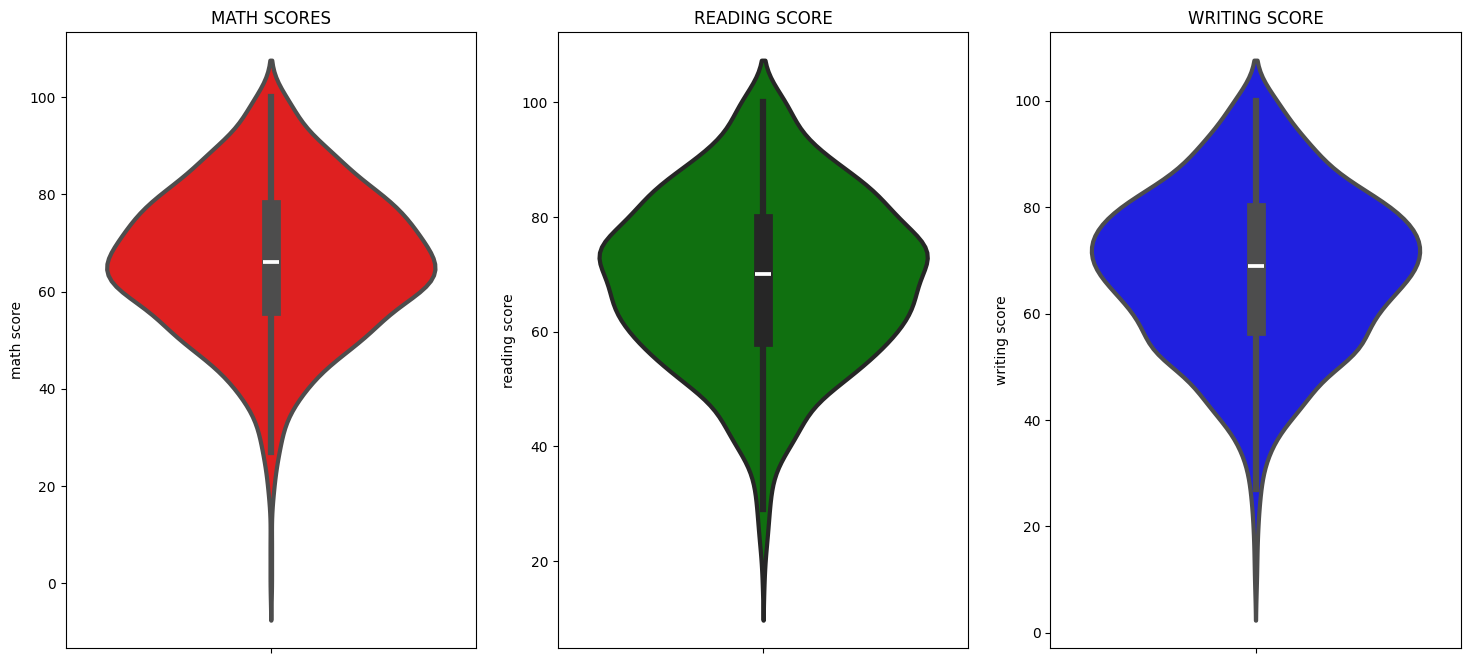

In [160]:
fig, axs = plt.subplots(1,3, figsize=(18, 8))

plt.subplot(131)
sns.violinplot(data=df, y='math score', color='red', linewidth=3)
axs[0].set_title('MATH SCORES')

plt.subplot(132)
sns.violinplot(data=df, y='reading score', color='green', linewidth=3)
axs[1].set_title('READING SCORE')

plt.subplot(133)
sns.violinplot(data=df, y='writing score', color='blue', linewidth=3)
axs[2].set_title('WRITING SCORE')

plt.show()

**Insigths**
- From the above three plots, it's clearly visible that most of the students score between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

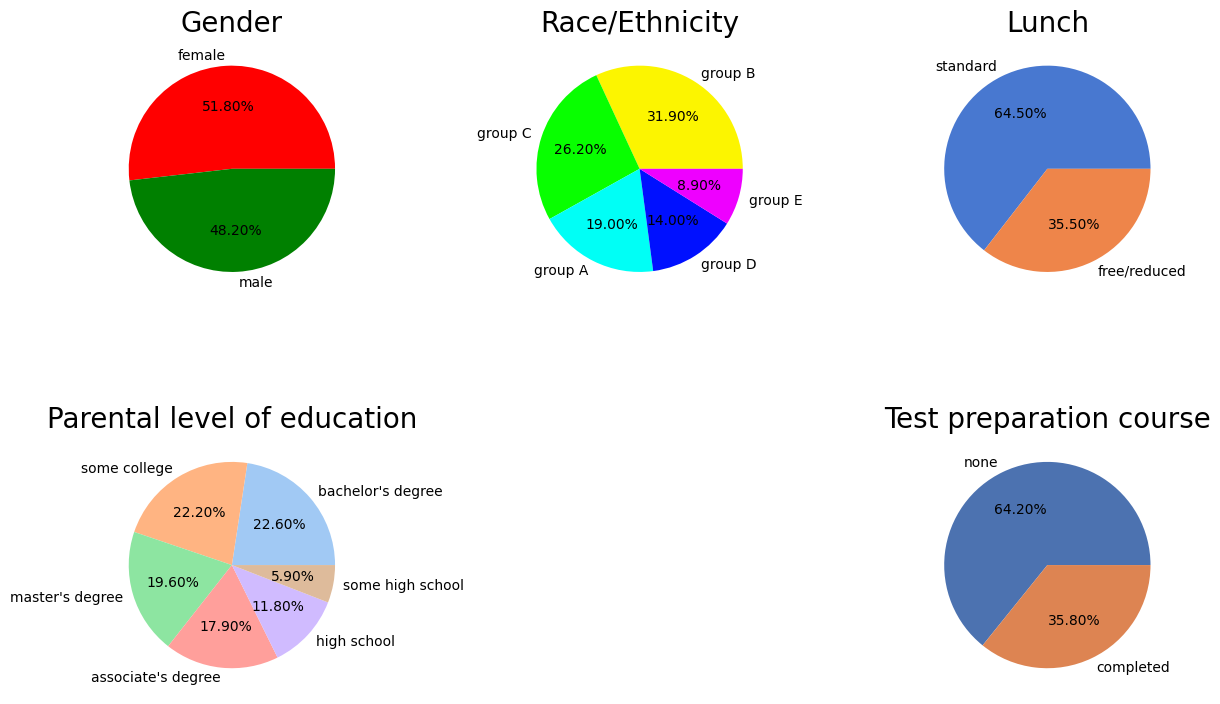

In [161]:
plt.rcParams['figure.figsize'] = (12, 16)

# Gender
plt.subplot(1, 3, 1)
size = df['gender'].value_counts()
labels = df['gender'].unique()
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Race/Ethnicity
plt.subplot(1, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = df['race/ethnicity'].unique()
color = sns.color_palette('hsv', len(labels))
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# Lunch
plt.subplot(1, 3, 3)
size = df['lunch'].value_counts()
labels = df['lunch'].unique()
color = sns.color_palette('muted', len(labels))
plt.pie(size, labels=labels, colors=color, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Parental level of education
plt.subplot(2, 3, 4)
size = df['parental level of education'].value_counts()
labels = df['parental level of education'].unique()
color = sns.color_palette('pastel', len(labels))
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental level of education', fontsize=20)
plt.axis('off')

# Test preparation course
plt.subplot(2, 3, 6)
size = df['test preparation course'].value_counts()
labels = df['test preparation course'].unique()
color = sns.color_palette('deep', len(labels))
plt.pie(size, labels=labels, colors=color, autopct='%.2f%%')
plt.title('Test preparation course', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

**Insights**
- Number of Male and Female students is almost equal
- Number of students is greatest in Group B and least in Group E
- Number of students who have standard lunch is greater, almost two thirds
- Number of students who parental education is Bachelor's degree or some college is greater followed closely by master's degree then Associate's degree
- Number of students who havw not enrolled in any test preparation course is greater, almost two thirds.

#### 4.4 Feature Wise Visualization 

#### 4.4.1 Gender Column
- How is the distribution of gender?
- Does gender have any impact on student performance?

**UNIVARIATE ANALYSIS (How is the distribution of gender?)**

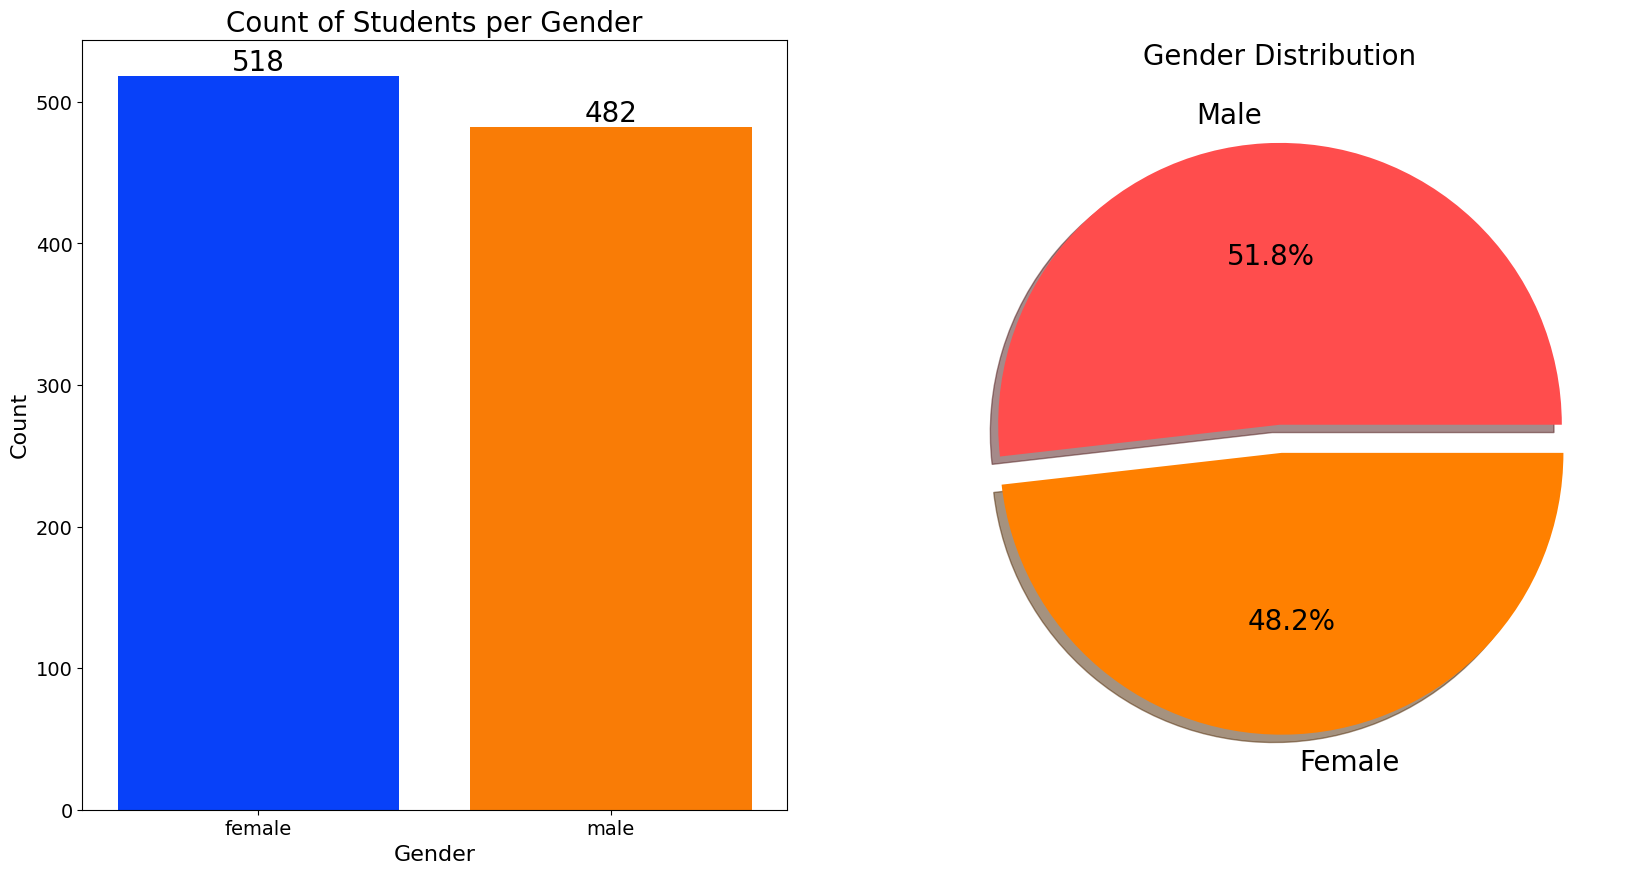

In [162]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

# Countplot
sns.countplot(
    data=df,
    x=df['gender'],
    palette='bright',
    ax=axs[0],
    saturation=0.95
    )
for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=20)
axs[0].set_title('Count of Students per Gender', fontsize=20)
axs[0].set_xlabel('Gender', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=14)

# Pie chart
plt.pie(
    x=df['gender'].value_counts(),
    labels=['Male', 'Female'],
    explode=[0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    colors=['#ff4d4d', '#ff8000'],
    textprops={'fontsize': 20}
    )
plt.title('Gender Distribution', fontsize=20)

plt.show()

**Insights**
- Gender has balanced data with number of female students as 518 (48%)and male students 482 (52%)

**BIVARIATE ANALYSIS (Does gender have any impact on student's performance?)**

In [163]:
# update numerical columns
numerical_columns = [column for column in df.columns if df[column].dtype != 'O']
numerical_columns

['math score', 'reading score', 'writing score', 'total score', 'average']

In [164]:
gender_group = df.groupby('gender')[numerical_columns].mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.835685


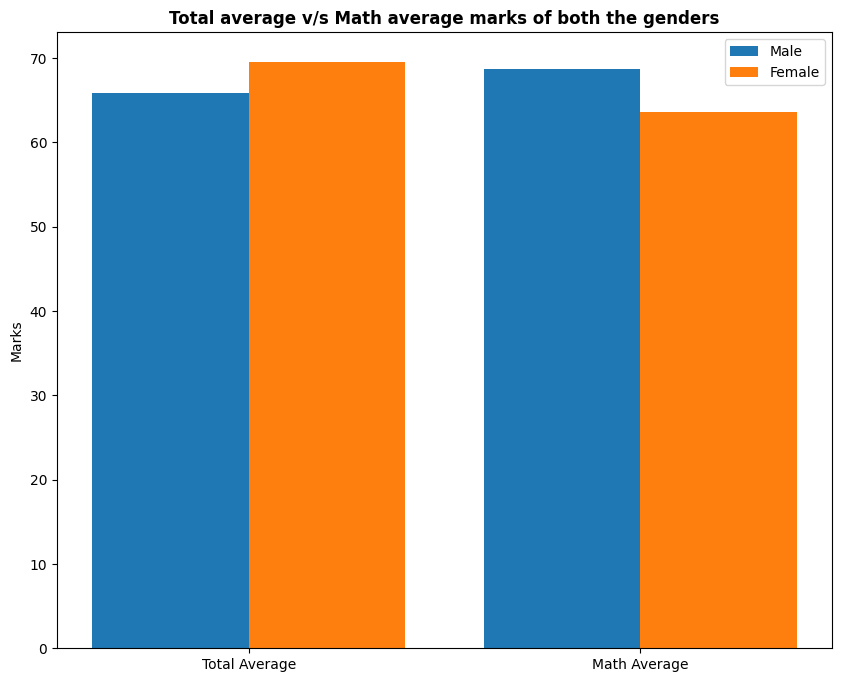

In [165]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')
plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title('Total average v/s Math average marks of both the genders', fontweight='bold')
plt.legend()

plt.show()

**Insights**
- On average, females have better overall scores than male.
- However, male score higher than females in Maths

#### 4.4.2 Race/Ethnicity Column
- How is group wise distribution?
- Does Race/Ethnicity have any impact on student's performance?

**UNIVARIATE ANALYSIS (How id goup wise distribution?)**

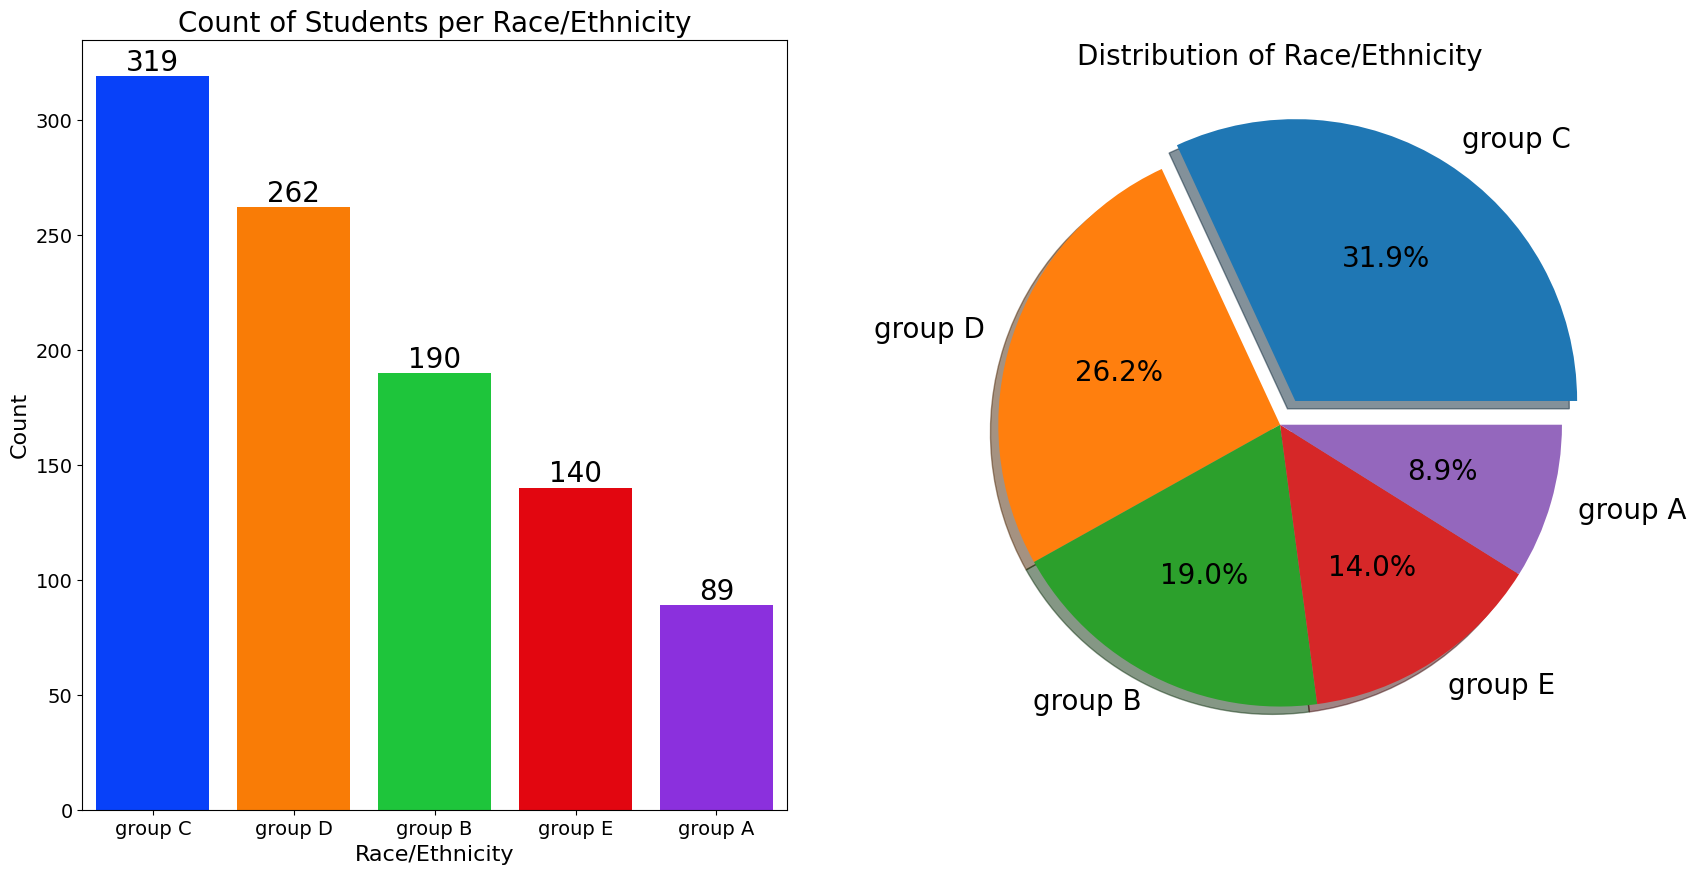

In [173]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Countplot
sns.countplot(
    data=df,
    x=df['race/ethnicity'],
    palette='bright',
    ax=axs[0],
    saturation=0.95,
    order= df['race/ethnicity'].value_counts().index
    )
for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=20)
axs[0].set_title('Count of Students per Race/Ethnicity', fontsize=20)
axs[0].set_xlabel('Race/Ethnicity', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=14)

# Pie chart
plt.pie(
    x=df['race/ethnicity'].value_counts(),
    labels=df['race/ethnicity'].value_counts().index,
    explode=(0.1, 0, 0, 0, 0),
    autopct='%1.1f%%', shadow=True,
    textprops=({'fontsize': 20})
    )
plt.title('Distribution of Race/Ethnicity', fontsize=20)

plt.show()

**Insights**
- Most of the students belong to group C / group D (Close to 60%)
- Lowest number of students belong to group A (less than 10%)

**BIVARIATE ANALYSIS (Does Race/Ethnicity have any impact on student's performance?)**

In [182]:
group_race_ethnicity = df.groupby('race/ethnicity')[numerical_columns].mean().round(1)
group_race_ethnicity

,math score,reading score,writing score,total score,average
race/ethnicity,,,,,
group A,61.6,64.7,62.7,189.0,63.0
group B,63.5,67.4,65.6,196.4,65.5
group C,64.5,69.1,67.8,201.4,67.1
group D,67.4,70.0,70.1,207.5,69.2
group E,73.8,73.0,71.4,218.3,72.7


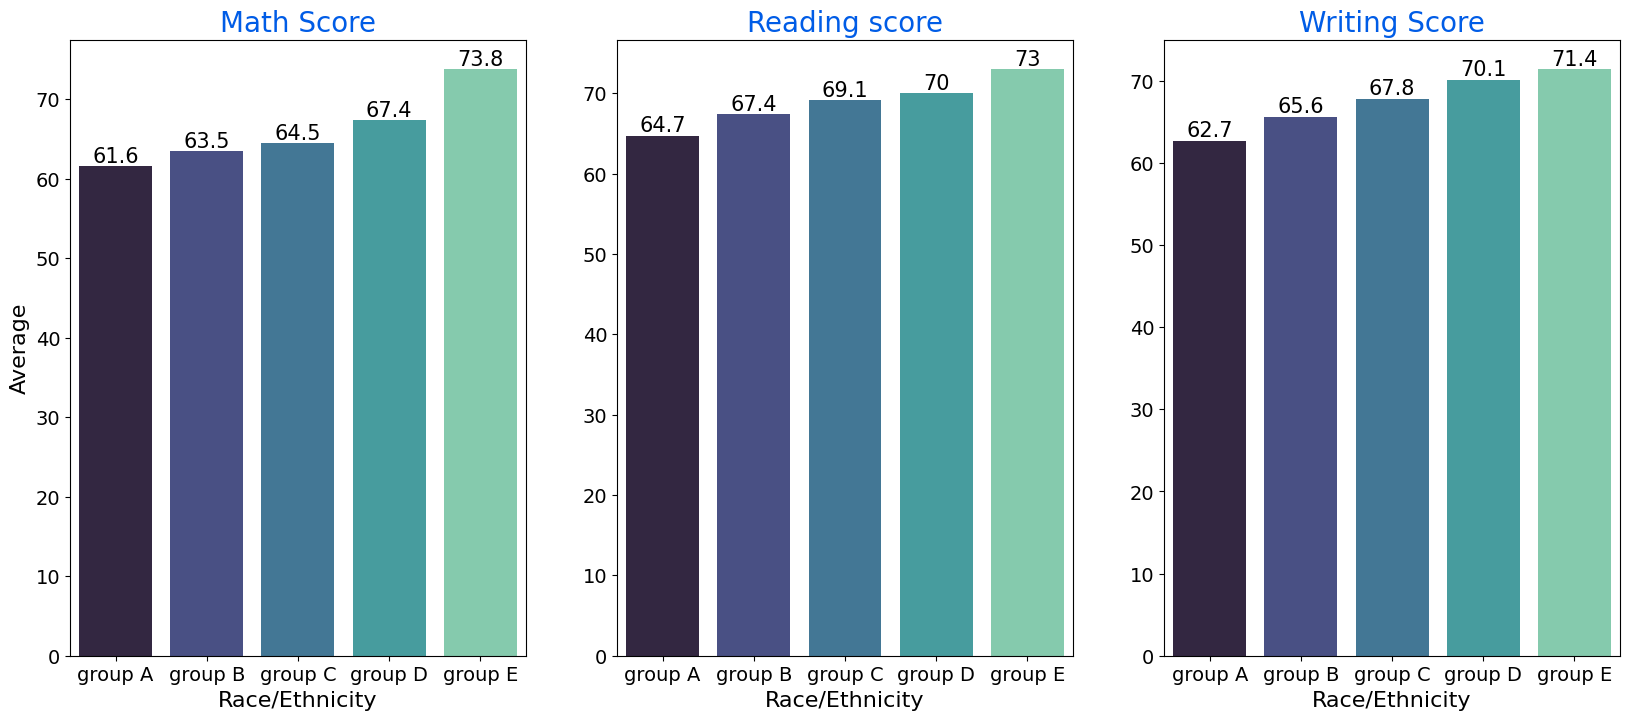

In [188]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(
    x=group_race_ethnicity['math score'].index,
    y=group_race_ethnicity['math score'].values,
    palette='mako',
    ax=axs[0]
    )
axs[0].set_title('Math Score', color='#005ce6', size=20)
axs[0].set_xlabel('Race/Ethnicity', fontsize=16)
axs[0].set_ylabel('Average', fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=14)

for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=15)

sns.barplot(
    x=group_race_ethnicity['reading score'].index,
    y=group_race_ethnicity['reading score'].values,
    palette='mako',
    ax=axs[1]
)
axs[1].set_title('Reading score', color='#005ce6',size=20)
axs[1].set_xlabel('Race/Ethnicity', fontsize=16)
axs[1].set_ylabel('', fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=14)


for container in axs[1].containers:
    axs[1].bar_label(container, color='black', size=15)

sns.barplot(
    x=group_race_ethnicity['writing score'].index,
    y=group_race_ethnicity['writing score'].values,
    palette='mako',
    ax=axs[2]
)
axs[2].set_title('Writing Score', color='#005ce6', size=20)
axs[2].set_xlabel('Race/Ethnicity', fontsize=16)
axs[2].set_ylabel('', fontsize=16)
axs[2].tick_params(axis='both', which='major', labelsize=14)

for container in axs[2].containers:
    axs[2].bar_label(container, color='black', size=15)

plt.show()

**Insights**
- Group E students have scored the highest marks across the subjects
- Group A students have scores the lowest maerks across the subjects


#### Parental level of education column
- What is the educational background of students' parents?
- Does parental education have any impact on student's performance?

**UNIVARIATE ANALYSIS (What is the education background og students' parents?)**

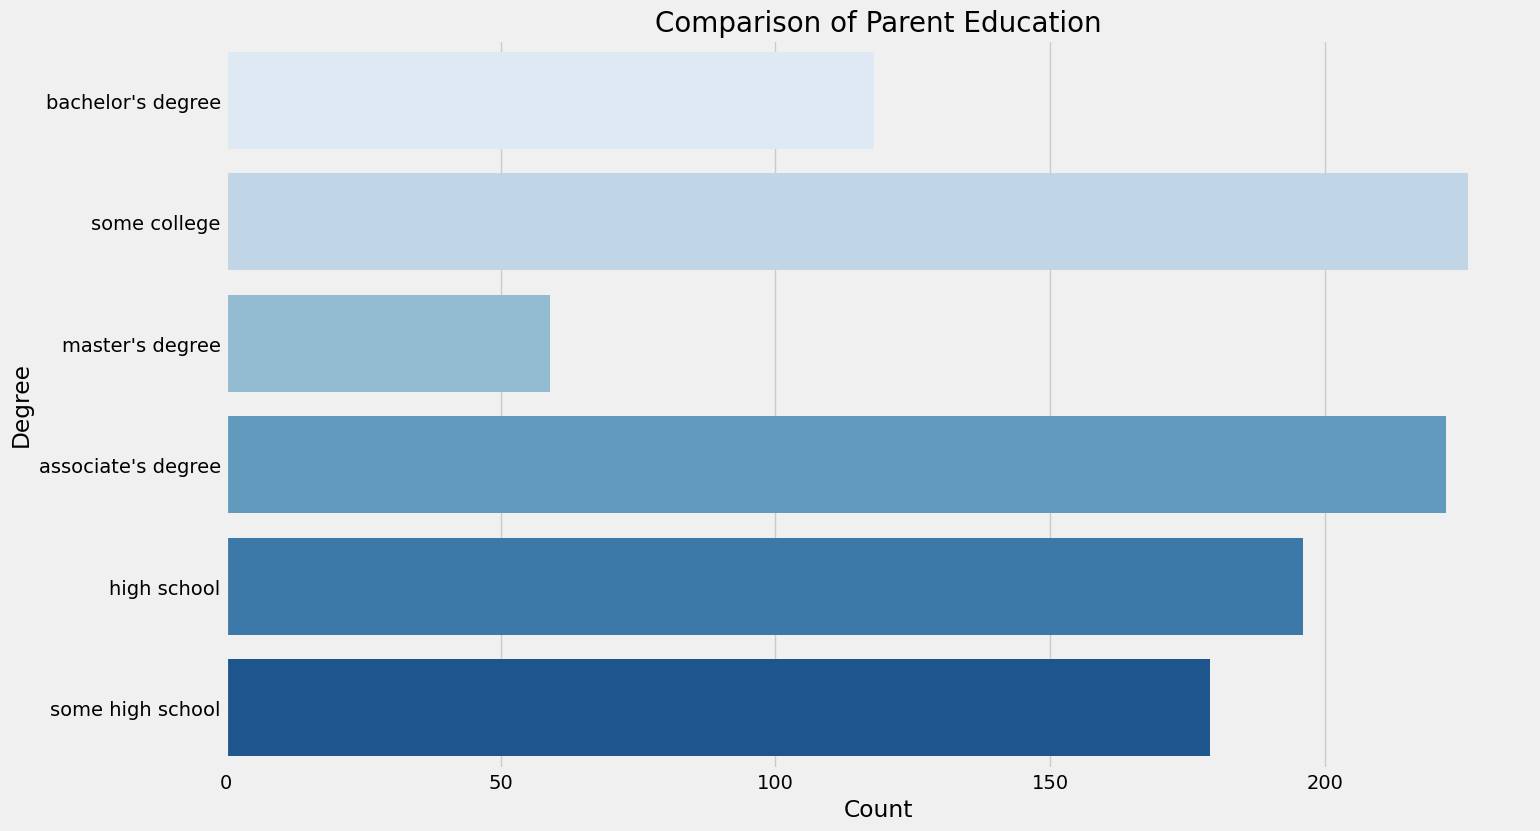

In [190]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(
    df['parental level of education'],
    palette='Blues'
)
plt.title('Comparison of Parent Education', fontweight=30, fontsize=20)
plt.xlabel('Count')
plt.ylabel('Degree')
plt.show()

**Insights**
- The largest number of parents are from some college and associate's degree
- There is uniformity in the numbers if we consider that parents with master's dgree also have bachelor's degree such that total bachelor's degree parents = bachelor's degree + master's degree

**BIVARIATE ANALYSIS (Does parental education have any impact on student's performance? )**

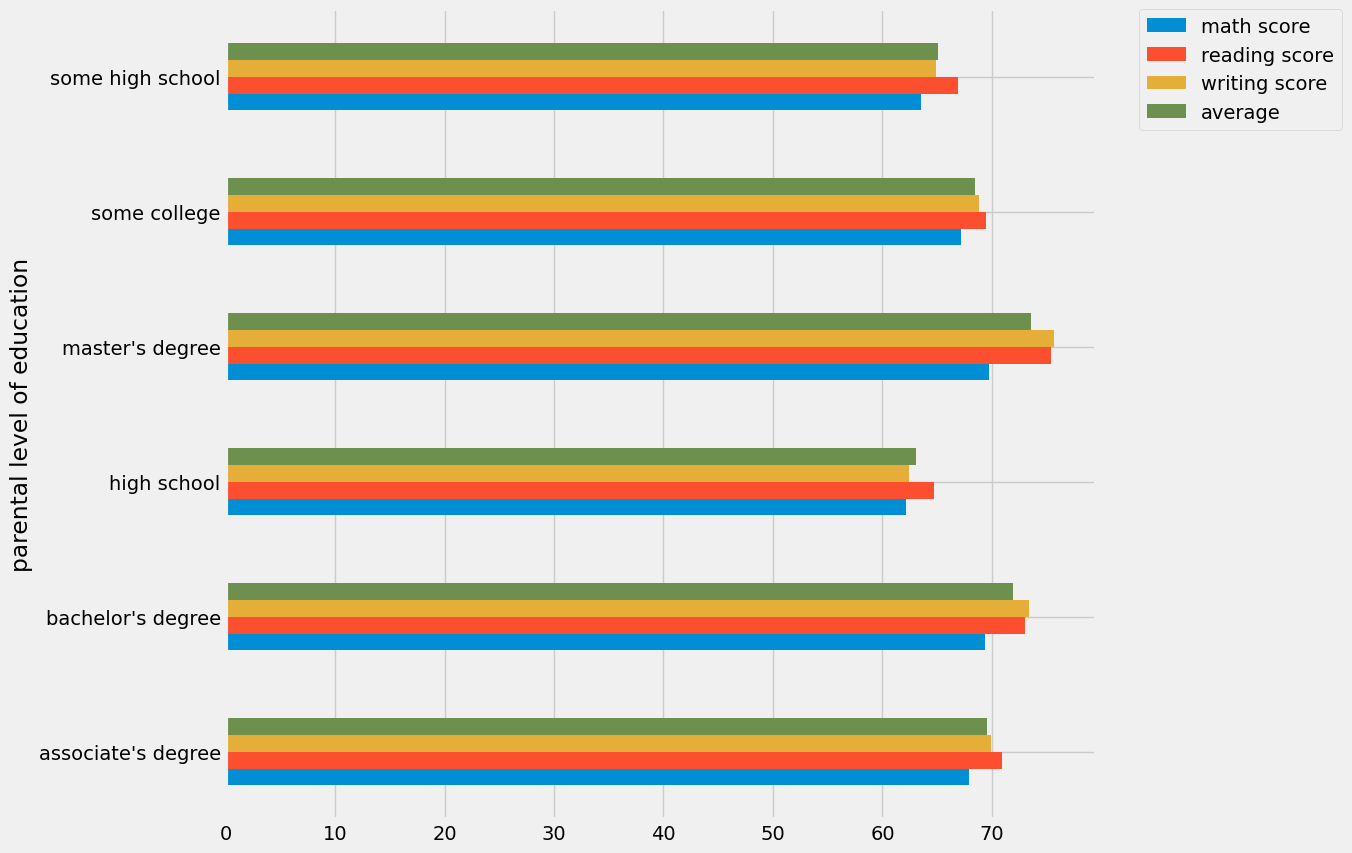

In [199]:
df.groupby('parental level of education')[numerical_columns].agg('mean').plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Insights**
- The scores of students whose parents possess masters and bachelors level of education are higher than others

#### 4.4.4 LUNCH COLUMN
- Which type of lunch is the most common among students ?
- What is the effect of lunch type on test results?

**UNIVARIATE ANALYSIS (Which type of lunch is the most common among students ?)**

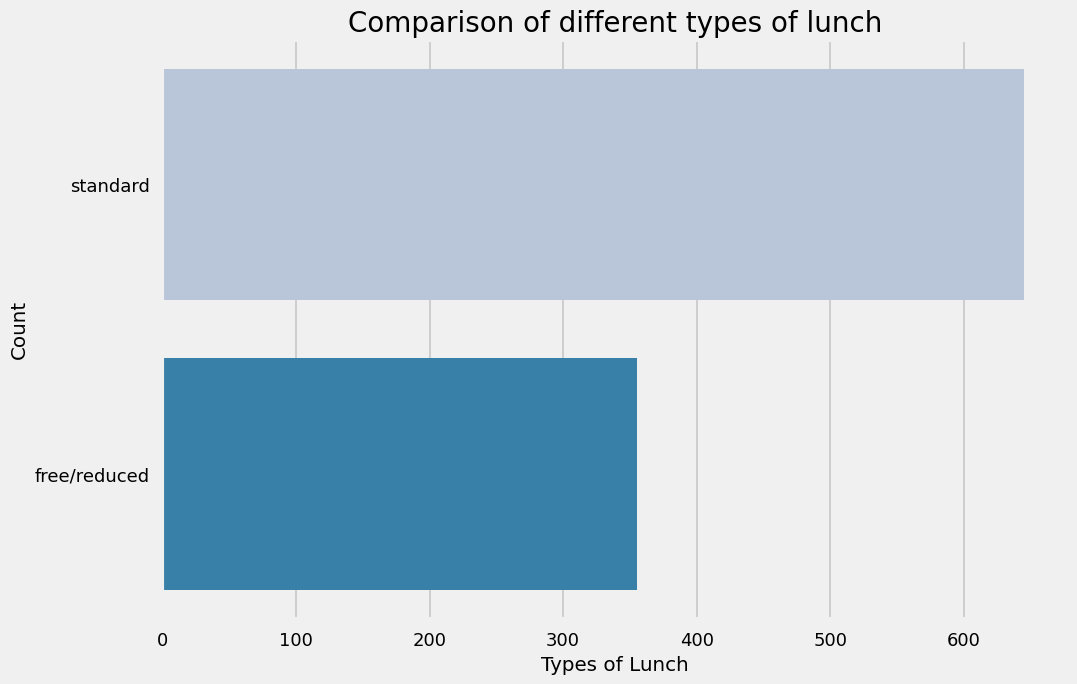

In [204]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(
    df['lunch'],
    palette='PuBu'
)
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()

**Insights**
- Students being served Standard lunch is more than free lunch. Half of the students are on free/reduced lunch

**BIVARIATE ANALYSIS (Does lunch type intake have any impact on student's performance?)**

In [208]:
group_lunch = df.groupby('lunch')[numerical_columns].agg('mean').round(2)
group_lunch

,math score,reading score,writing score,average
lunch,,,,
free/reduced,58.92,64.65,63.02,62.20
standard,70.03,71.65,70.82,70.84


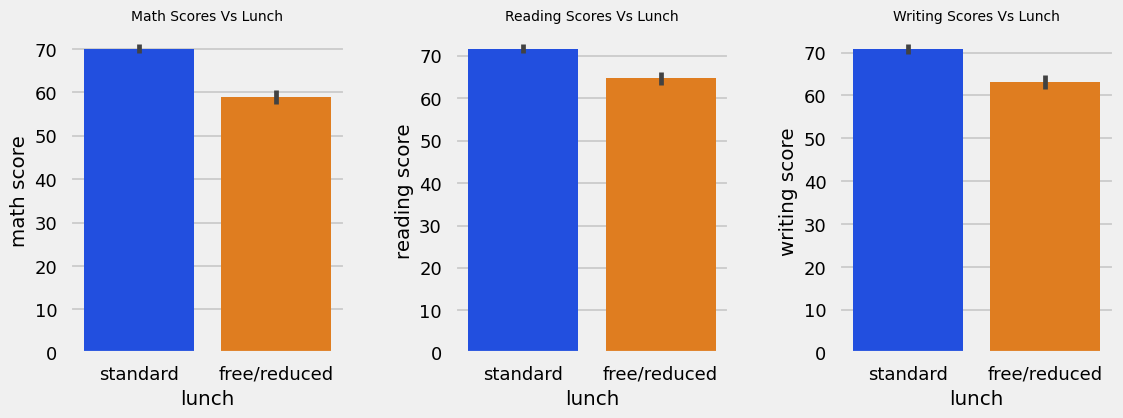

In [239]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.barplot(x=df['lunch'], y=df['math score'], palette='bright')
plt.title('Math Scores Vs Lunch', fontsize=10)

plt.subplot(1, 3, 2)
sns.barplot(x=df['lunch'], y=df['reading score'], palette='bright')
plt.title('Reading Scores Vs Lunch', fontsize=10)

plt.subplot(1, 3, 3)
sns.barplot(x=df['lunch'], y=df['writing score'], palette='bright')
plt.title('Writing Scores Vs Lunch', fontsize=10)

plt.subplots_adjust(wspace=0.4)

plt.show()

**Insights**
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 Test Preparation course column
- Does Test prepration course have any impact on student's performance?

**BIVARIATE ANALYSIS (Does Test prepration course has any impact on student's performance?)**

In [248]:
group_test = df.groupby('test preparation course')[numerical_columns].agg('mean')
group_test

,math score,reading score,writing score,average
test preparation course,,,,
completed,69.695531,73.893855,74.418994,72.669553
none,64.077882,66.534268,64.504673,65.037539


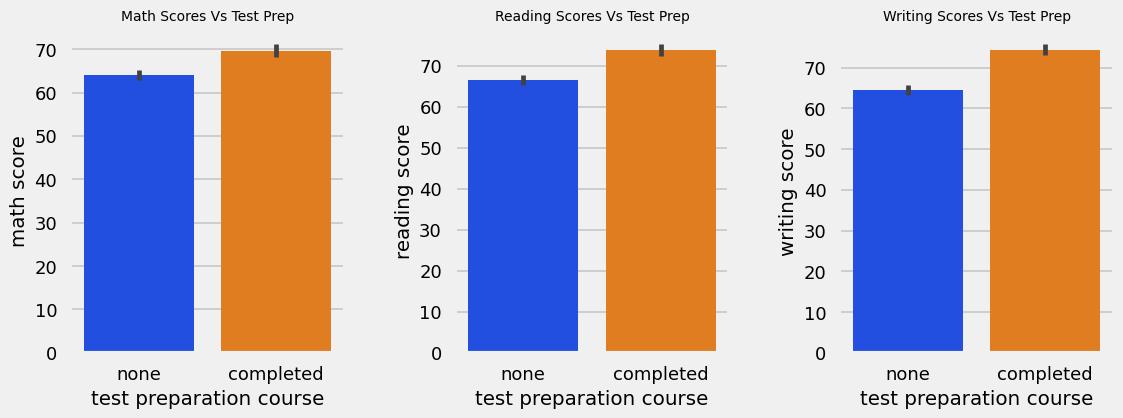

In [243]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.barplot(x=df['test preparation course'],
            y=df['math score'], palette='bright')
plt.title('Math Scores Vs Test Prep', fontsize=10)

plt.subplot(1, 3, 2)
sns.barplot(x=df['test preparation course'],
            y=df['reading score'], palette='bright')
plt.title('Reading Scores Vs Test Prep', fontsize=10)

plt.subplot(1, 3, 3)
sns.barplot(x=df['test preparation course'],
            y=df['writing score'], palette='bright')
plt.title('Writing Scores Vs Test Prep', fontsize=10)

plt.subplots_adjust(wspace=0.4)

plt.show()

**Insights**
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course.

#### 4.4.6 Checking Outliers

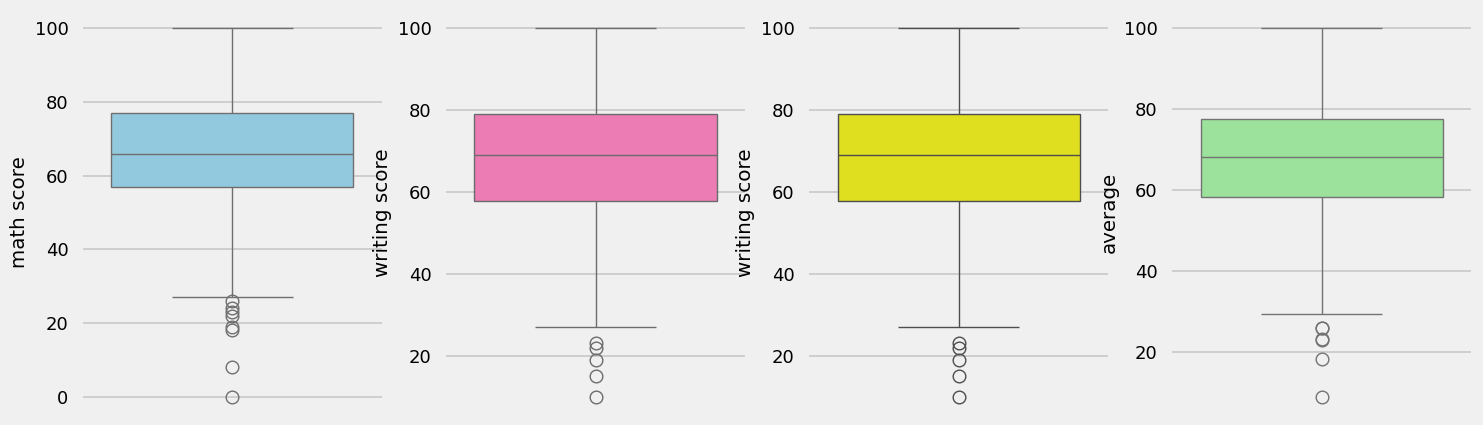

In [246]:
plt.subplots(1, 4, figsize=(16, 5))

plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue')

plt.subplot(142)
sns.boxplot(df['writing score'], color='hotpink')

plt.subplot(143)
sns.boxplot(df['writing score'], color='yellow')

plt.subplot(144)
sns.boxplot(df['average'], color='lightgreen')

plt.show()

#### 4.4.7 Multivariate Analysis using pairplot

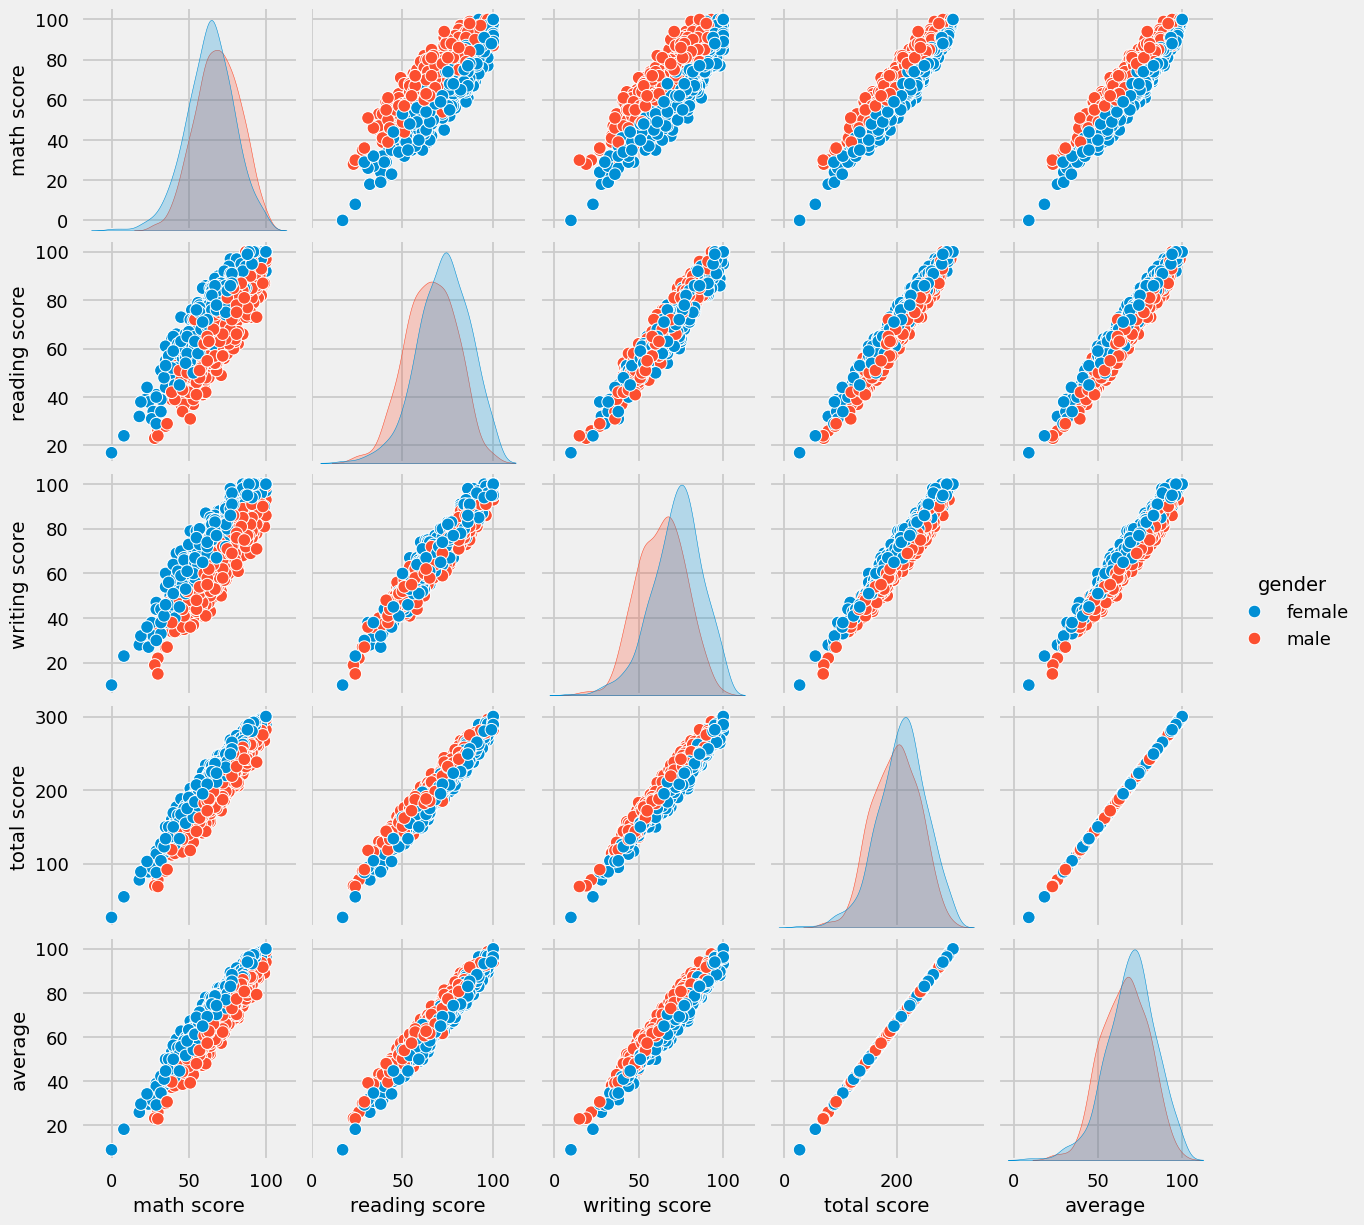

In [247]:
sns.pairplot(df, hue='gender')
plt.show()

**Insights**
- From the above plot it is clear that all the scores increase linearly with each other.

### Conclusions
- Student's performance is related with lunch, race/ethnicity, and parental level of education, and test preparation course completion.
- Females lead in pass percentage and are also top scorers
- Finishing preparation course is beneficial

In [252]:
# End of EDA